In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.graph_objects as go

In [30]:
data = pd.read_csv("mean and medium income.csv")

In [31]:
data.head()

,age,sex,indic_il,unit,Geo_time,2019,2018,2017,2016,2015,...,2005,2004,2003,2001,2000,1999,1998,1997,1996,1995
0,TOTAL,F,MED_E,EUR,AT,25241,24675,24433,23202,22741,...,17402,16603,15275 b,14667,14535,13888,13677,13841,14277,13394
1,TOTAL,F,MED_E,EUR,BE,24013 b,23135,21976,21550,21012,...,16081,15353,14994 b,15081,14378,13885,13669,13707,13735,13085
2,TOTAL,F,MED_E,EUR,BG,4059,3474,3480,3043 b,3236,...,:,:,:,:,:,:,:,:,:,:
3,TOTAL,F,MED_E,EUR,CH,:,42253,42640,43091,38361,...,:,:,:,:,:,:,:,:,:,:
4,TOTAL,F,MED_E,EUR,CY,16144,15199,14180,13854,13618,...,13027,:,:,:,:,:,:,:,:,:


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16986 entries, 0 to 16985
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       16986 non-null  object
 1   sex       16986 non-null  object
 2   indic_il  16986 non-null  object
 3   unit      16986 non-null  object
 4   Geo_time  16986 non-null  object
 5   2019      16986 non-null  object
 6   2018      16986 non-null  object
 7   2017      16986 non-null  object
 8   2016      16986 non-null  object
 9   2015      16986 non-null  object
 10  2014      16986 non-null  object
 11  2013      16986 non-null  object
 12  2012      16986 non-null  object
 13  2011      16986 non-null  object
 14  2010      16986 non-null  object
 15  2009      16986 non-null  object
 16  2008      16986 non-null  object
 17  2007      16986 non-null  object
 18  2006      16986 non-null  object
 19  2005      16986 non-null  object
 20  2004      16986 non-null  object
 21  2003      16

In [33]:
data.columns

Index(['age', 'sex', 'indic_il', 'unit', 'Geo_time', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2001', '2000', '1999', '1998',
       '1997', '1996', '1995'],
      dtype='object')

In [40]:
for i in (1995,1996,1997,1998,1999,2000,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019):
    data[str(i)] = data["{}".format(i)].str.replace(" b","")
    data["{}".format(i)] = data["{}".format(i)].str.replace(" e","")
    data["{}".format(i)] = data["{}".format(i)].str.replace(" u","")    

In [41]:
data.replace(": ", np.NaN, inplace=True)

In [42]:
for i in (1995,1996,1997,1998,1999,2000,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019):
    data["{}".format(i)] = data["{}".format(i)].astype("Float32")

In [43]:
data

,age,sex,indic_il,unit,Geo_time,2019,2018,2017,2016,2015,...,2005,2004,2003,2001,2000,1999,1998,1997,1996,1995
0,TOTAL,F,MED_E,EUR,AT,25241.0,24675.0,24433.0,23202.0,22741.0,...,17402.0,16603.0,15275.0,14667.0,14535.0,13888.0,13677.0,13841.0,14277.0,13394.0
1,TOTAL,F,MED_E,EUR,BE,24013.0,23135.0,21976.0,21550.0,21012.0,...,16081.0,15353.0,14994.0,15081.0,14378.0,13885.0,13669.0,13707.0,13735.0,13085.0
2,TOTAL,F,MED_E,EUR,BG,4059.0,3474.0,3480.0,3043.0,3236.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,TOTAL,F,MED_E,EUR,CH,<NA>,42253.0,42640.0,43091.0,38361.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,TOTAL,F,MED_E,EUR,CY,16144.0,15199.0,14180.0,13854.0,13618.0,...,13027.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16981,Y_LT75,T,MEI_E,PPS,SI,18252.0,17005.0,16445.0,16491.0,16327.0,...,12673.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
16982,Y_LT75,T,MEI_E,PPS,SK,<NA>,10342.0,10092.0,11194.0,10824.0,...,4440.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
16983,Y_LT75,T,MEI_E,PPS,TR,<NA>,9112.0,9217.0,9056.0,7810.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
16984,Y_LT75,T,MEI_E,PPS,UK,<NA>,22439.0,22081.0,20494.0,21555.0,...,20965.0,<NA>,<NA>,17720.0,16358.0,15111.0,15433.0,14560.0,13927.0,13629.0


In [44]:
data.describe()

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2005,2004,2003,2001,2000,1999,1998,1997,1996,1995
count,11220.0,16104.0,14784.0,14784.0,14784.0,14784.0,14784.0,13992.0,13596.0,13596.0,...,11088.0,5940.0,2772.0,3690.0,3690.0,3690.0,3690.0,3690.0,3690.0,3420.0
mean,58364.92549,85249.716841,86812.519481,82254.181818,77398.467532,73987.281385,70880.619048,69104.118925,67511.461018,67932.168285,...,84370.41847,70743.892256,34239.809524,13996.828184,13261.511111,12590.663415,12199.304065,11715.740921,11291.116531,10855.823392
std,220570.618602,481508.073931,472936.195457,440959.91511,405789.991698,382313.248889,360055.61403,345698.629025,338903.400651,352508.317672,...,343358.752513,298060.287583,51638.540074,4502.762015,4333.079504,4186.838909,4096.08958,4120.904023,4129.978394,4115.242819
min,2572.0,1808.0,1738.0,1758.0,1612.0,1489.0,1385.0,1440.0,1589.0,1554.0,...,1467.0,1794.0,5971.0,4226.0,3923.0,3643.0,3352.0,3212.0,3041.0,2760.0
25%,11348.5,9567.75,9227.0,8913.75,8462.75,8282.25,8006.75,8690.25,8903.0,8763.75,...,8803.75,11788.75,14995.5,10883.0,10270.0,9599.0,9212.5,8603.25,8084.75,7687.5
50%,18135.0,17806.0,17390.0,16964.0,16513.0,16435.5,16341.5,16779.0,16619.0,16553.0,...,14956.5,15957.5,17470.0,14146.0,13322.5,12672.5,12362.0,11726.5,11278.5,10822.5
75%,25290.25,24683.25,24675.0,24242.0,23374.25,22804.25,22420.5,21984.25,21383.0,20995.0,...,18970.25,20006.25,25253.25,16226.5,15415.0,14820.0,14428.0,14045.5,13719.25,13358.25
max,2297474.0,6283037.0,6078289.0,5683483.0,5512756.0,4833496.0,4548446.0,4161840.0,4133924.0,4651655.0,...,2986822.0,2755885.0,300677.0,30819.0,30564.0,29767.0,27557.0,27370.0,26388.0,24194.0


In [45]:
data.isnull().sum()

age             0
sex             0
indic_il        0
unit            0
Geo_time        0
2019         5766
2018          882
2017         2202
2016         2202
2015         2202
2014         2202
2013         2202
2012         2994
2011         3390
2010         3390
2009         4050
2008         4050
2007         4314
2006         5106
2005         5898
2004        11046
2003        14214
2001        13296
2000        13296
1999        13296
1998        13296
1997        13296
1996        13296
1995        13566
dtype: int64

<AxesSubplot:>

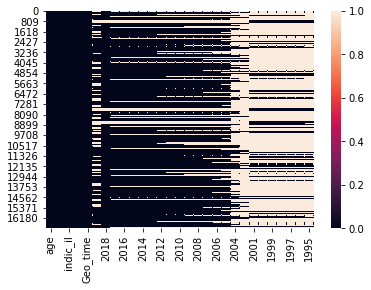

In [11]:
sns.heatmap(data.isnull())

In [12]:
print(data.columns)
print(len(data.columns))

Index(['age', 'sex', 'indic_il', 'unit', 'Geo_time', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2001', '2000', '1999', '1998',
       '1997', '1996', '1995'],
      dtype='object')
29


## Analysis part begins from here

In [13]:
# 1. What is the average mean salary of dfferent sex(gender) and in total in different consecutive years?

In [14]:
dff = data.loc[data["sex"] == 'F'].drop(columns = ['age' , 'sex' , 'indic_il' , 'unit' , 'Geo_time'])
f = dff.mean()
mean_df_1 = f.to_frame()
mean_df_1.columns = ["F"]

dff = data.loc[data["sex"] == 'M'].drop(columns = ['age' , 'sex' , 'indic_il' , 'unit' , 'Geo_time'])
m = dff.mean()
mean_df_2 = m.to_frame()
mean_df_2.columns = ["M"]

dff = data.loc[data["sex"] == 'T'].drop(columns = ['age' , 'sex' , 'indic_il' , 'unit' , 'Geo_time'])
t = dff.mean()
mean_df_3 = t.to_frame()
mean_df_3.columns = ["T"]


mean_df = pd.DataFrame()
mean_df["F"] = mean_df_1["F"]
mean_df["M"] = mean_df_2["M"]
mean_df["T"] = mean_df_3["T"]

In [15]:
mean_df

,F,M,T
2019,57525.648438,59256.507812,58312.890625
2018,84406.937500,86120.679688,85221.539062
2017,85898.468750,87759.359375,86779.593750
2016,81574.460938,82968.710938,82219.593750
2015,76705.828125,78118.289062,77371.148438
2014,72989.140625,75048.304688,73924.382812
2013,69751.039062,72065.445312,70825.484375
2012,67918.453125,70330.718750,69063.273438
2011,66395.648438,68684.093750,67454.742188
2010,66800.187500,69121.914062,67874.500000


<AxesSubplot:>

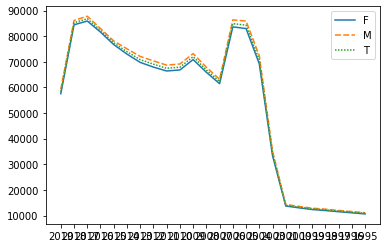

In [16]:
sns.lineplot(data=mean_df)

In [17]:
mn = mean_df.mean(axis = 1)
mean = mn.to_frame()
mean.columns=("Mean",)

In [18]:
mean

,Mean
2019,58365.015625
2018,85249.718750
2017,86812.476562
2016,82254.257812
2015,77398.429688
2014,73987.273438
2013,70880.656250
2012,69104.148438
2011,67511.500000
2010,67932.195312


<AxesSubplot:>

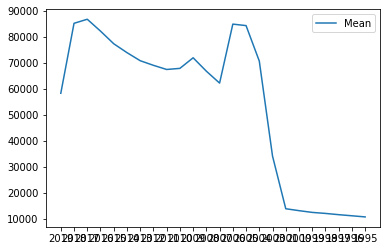

In [19]:
sns.lineplot(data=mean)

In [20]:
# 2. What is the average mean salary in different geograpfic locations?

In [21]:
geo_mean = data.drop(columns = ['age' , 'sex' , 'indic_il' , 'unit']).groupby(['Geo_time',]).mean()

In [22]:
geo_mean

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2005,2004,2003,2001,2000,1999,1998,1997,1996,1995
Geo_time,,,,,,,,,,,,,,,,,,,,,
AT,26082.472656,2.552358e+04,2.537642e+04,2.424307e+04,2.376419e+04,2.372204e+04,2.252034e+04,2.243065e+04,2.203748e+04,2.143366e+04,...,18391.718750,17386.890625,16284.936523,15487.166992,15275.863281,14334.003906,14030.663086,13965.681641,14124.181641,13840.237305
BE,24260.111328,2.342069e+04,2.272738e+04,2.276797e+04,2.186273e+04,2.161933e+04,2.156049e+04,2.020129e+04,1.988758e+04,1.941866e+04,...,16870.730469,15789.179688,16149.113281,16222.921875,15430.159180,14946.374023,14490.518555,14183.118164,13782.704102,13405.911133
BG,7975.090820,6.746025e+03,6.817838e+03,5.846768e+03,6.174715e+03,5.910457e+03,5.262475e+03,4.983967e+03,5.155318e+03,5.242389e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,4.156944e+04,4.188532e+04,4.199573e+04,4.011723e+04,3.923566e+04,4.041233e+04,3.894181e+04,3.650268e+04,3.474476e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,18363.025391,1.694367e+04,1.648937e+04,1.608065e+04,1.573287e+04,1.675281e+04,1.787013e+04,1.902390e+04,1.864772e+04,1.782164e+04,...,12394.015625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ,98205.507812,9.173545e+04,8.610819e+04,8.232111e+04,7.844265e+04,7.606494e+04,7.437955e+04,7.328105e+04,7.215507e+04,7.110231e+04,...,51687.214844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE,24313.595703,2.385401e+04,2.290773e+04,2.236584e+04,2.182502e+04,2.082615e+04,2.083739e+04,2.045009e+04,1.982049e+04,1.945201e+04,...,16789.992188,NaN,NaN,16409.156250,15717.615234,14925.103516,14507.555664,14528.607422,13993.047852,13262.489258
DK,98782.312500,9.662355e+04,9.428502e+04,9.288932e+04,9.063563e+04,8.912641e+04,8.678949e+04,8.570936e+04,8.496623e+04,7.877370e+04,...,68032.750000,65922.437500,65430.714844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EA,20390.855469,1.999469e+04,1.977406e+04,1.928095e+04,1.881548e+04,1.857137e+04,1.856925e+04,1.853042e+04,1.828944e+04,1.836223e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Geo_time'>

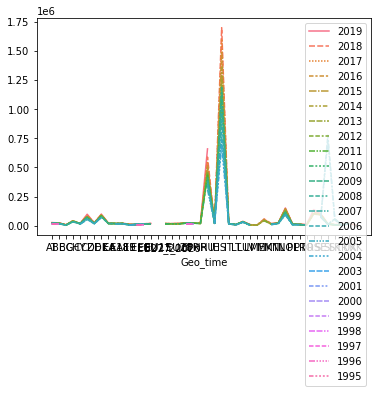

In [23]:
sns.lineplot(data=geo_mean)

In [24]:
# 3. What is the median salary of different sex(gender) and in total in different consecutive years?

In [25]:
dff = data.loc[data["sex"] == 'F'].drop(columns = ['age' , 'sex' , 'indic_il' , 'unit' , 'Geo_time'])
f_m = dff.median()
median_df_1 = f_m.to_frame()
median_df_1.columns = ["F"]

dff = data.loc[data["sex"] == 'M'].drop(columns = ['age' , 'sex' , 'indic_il' , 'unit' , 'Geo_time'])
m_m = dff.median()
median_df_2 = m_m.to_frame()
median_df_2.columns = ["M"]

dff = data.loc[data["sex"] == 'T'].drop(columns = ['age' , 'sex' , 'indic_il' , 'unit' , 'Geo_time'])
t_m = dff.median()
median_df_3 = t_m.to_frame()
median_df_3.columns = ["T"]

median_df = pd.DataFrame()
median_df["F"] = median_df_1["F"]
median_df["M"] = median_df_2["M"]
median_df["T"] = median_df_3["T"]

In [26]:
median_df

,F,M,T
2019,17873.5,18410.0,18102.0
2018,17559.0,18090.0,17803.0
2017,17118.0,17656.0,17324.0
2016,16653.0,17249.0,16937.0
2015,16210.0,16759.5,16483.0
2014,16146.0,16666.0,16400.5
2013,16053.0,16680.5,16329.5
2012,16484.0,17168.5,16791.5
2011,16288.0,17017.5,16601.0
2010,16176.0,16894.0,16555.0


<AxesSubplot:>

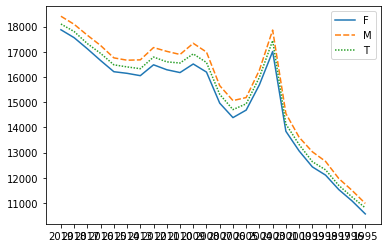

In [27]:
sns.lineplot(data=median_df)

In [28]:
md = median_df.median(axis = 1)
median = md.to_frame()
median.columns=("Median",)

In [29]:
median

,Median
2019,18102.0
2018,17803.0
2017,17324.0
2016,16937.0
2015,16483.0
2014,16400.5
2013,16329.5
2012,16791.5
2011,16601.0
2010,16555.0


<AxesSubplot:>

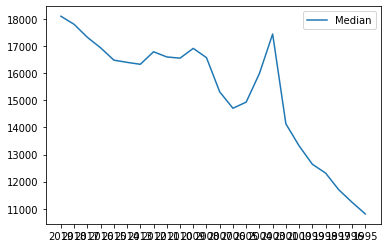

In [30]:
sns.lineplot(data=median)

In [31]:
# 4. What is the average median salary in different geographic locations?

In [32]:
geo_median = data.drop(columns = ['age' , 'sex' , 'indic_il' , 'unit']).groupby(['Geo_time',]).median()
geo_median

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2005,2004,2003,2001,2000,1999,1998,1997,1996,1995
Geo_time,,,,,,,,,,,,,,,,,,,,,
AT,26107.0,25669.5,25225.0,24153.0,23551.0,23729.0,22624.0,22526.0,22001.0,21498.5,...,18347.0,17273.0,16119.0,15606.5,15270.0,14397.0,14063.5,13875.0,14167.5,13783.0
BE,24512.0,23693.0,23166.0,23180.0,22109.0,21879.5,21897.5,20476.0,20139.0,19583.0,...,17043.0,15998.0,16484.0,16225.0,15368.5,14904.5,14510.5,14293.5,13782.0,13526.0
BG,8208.5,7057.5,7014.5,6182.0,6601.0,6523.5,5764.5,5489.5,5629.0,5723.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH,NaN,43564.5,43934.5,44153.5,41090.5,39631.5,42167.5,40403.0,35455.0,31828.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CY,18345.0,16934.0,16416.0,16027.0,15597.5,16414.0,17605.5,18888.5,18508.5,17845.0,...,13652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ,15051.5,14231.0,13578.0,13356.5,12414.5,11712.0,11402.0,10861.0,10587.5,10182.5,...,7987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE,24221.0,23789.5,22868.5,22371.5,21775.0,20835.0,20678.5,20393.5,19692.0,19251.0,...,16670.0,NaN,NaN,16190.5,15499.0,14721.0,14415.5,14462.5,13920.0,13153.0
DK,32519.0,31796.0,31374.5,31096.0,30231.5,29682.0,29126.5,28774.0,28322.0,26387.0,...,22612.5,21999.5,21639.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EA,20122.0,19830.0,19506.5,19098.5,18640.0,18413.5,18403.5,18402.5,18140.5,18093.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Geo_time'>

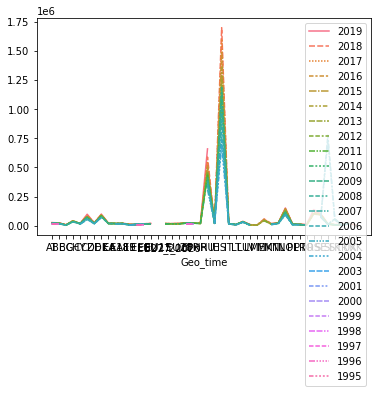

In [33]:
sns.lineplot(data=geo_mean)

In [34]:
# 5. Mean vs Median graph and Why mean is choosen over median to calculate the average number?

In [35]:
mean_median = pd.DataFrame()
mean_median["Mean"] = mean["Mean"]
mean_median["Median"] = median["Median"]

In [36]:
mean_median

,Mean,Median
2019,58365.015625,18102.0
2018,85249.718750,17803.0
2017,86812.476562,17324.0
2016,82254.257812,16937.0
2015,77398.429688,16483.0
2014,73987.273438,16400.5
2013,70880.656250,16329.5
2012,69104.148438,16791.5
2011,67511.500000,16601.0
2010,67932.195312,16555.0


<AxesSubplot:>

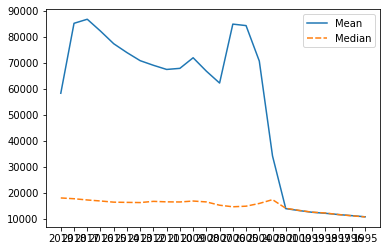

In [37]:
sns.lineplot(data=mean_median)

In [38]:
mean_df = mean_df.reindex(index = mean_df.index[::-1])
mean_df_pct = mean_df.pct_change()

In [39]:
mean_df_pct

,F,M,T
1995,NaN,NaN,NaN
1996,0.039953,0.040263,0.040064
1997,0.039066,0.036626,0.037184
1998,0.040262,0.042037,0.041495
1999,0.032735,0.031847,0.031672
2000,0.053861,0.052399,0.053615
2001,0.053841,0.057092,0.055344
2003,1.437770,1.453197,1.447469
2004,1.071706,1.060071,1.066911
2005,0.199069,0.187355,0.191684


<AxesSubplot:>

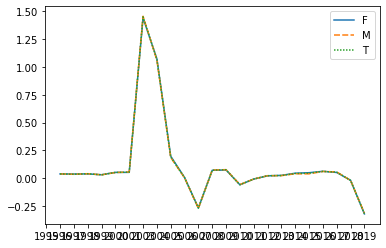

In [40]:
sns.lineplot(data=mean_df_pct)

In [41]:
# 6. What is the percentage rise in salary for different sex(gender) over a period of time?

In [42]:
mean = mean.reindex(index = mean.index[::-1])
mean_pct = mean.pct_change()

In [43]:
mean_pct

,Mean
1995,NaN
1996,0.040096
1997,0.037608
1998,0.041277
1999,0.032078
2000,0.053281
2001,0.055448
2003,1.446258
2004,1.066131
2005,0.192616


<AxesSubplot:>

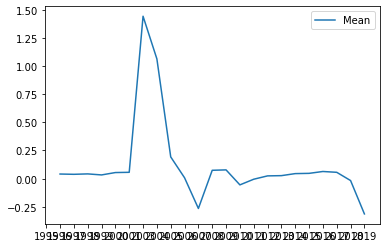

In [44]:
sns.lineplot(data=mean_pct)

In [45]:
print(mean_df_pct.max())
print(mean_pct.max())

F    1.437770
M    1.453197
T    1.447469
dtype: float32
Mean    1.446258
dtype: float32


In [46]:
# 7. What is the maximun percentage rise in salary over these different years?

In [47]:
data_pct = mean_df_pct.max().append(mean_pct.max())

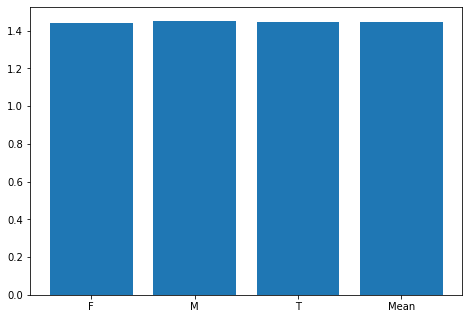

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['F','M','T', 'Mean']
ax.bar(langs,data_pct)
plt.show()